In [15]:
import pickle 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib.patches as mpatches

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 11

path = 'C:/Users/Besitzer/Desktop/Geospatial Analysis/Data'

os.chdir('C:/Users/Besitzer/Desktop/Geospatial Analysis/')

In [3]:
for file in os.listdir(path):
    #print(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    data['oneway_proportion'] = data['oneway'] / data['m']

#### Correlation

In [4]:
path = 'C:/Users/Besitzer/Desktop/Geospatial Analysis/Data'
corr_data = pd.DataFrame(index=['n', 'm', 'k_avg', 'intersection_count', 'streets_per_node_avg', 'edge_length_total',
         'edge_length_avg', 'street_length_total', 'street_length_avg', 'street_segments_count',
         'node_density_km', 'intersection_density_km', 'edge_density_km', 'street_density_km',
         'circuity_avg', 'self_loop_proportion', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree_avg',
         'degree_centrality_avg', 'clustering_coefficient_avg', 'clustering_coefficient_weighted_avg',
         'diameter', 'radius', 'closeness_centrality_avg', 'betweenness_centrality_avg', 'oneway', 'oneway_proportion'])
for file in os.listdir(path):
    #print(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    data['oneway_proportion'] = data['oneway'] / data['m']
    data = data[corr_data.index]
    data = data.to_frame(name=file.replace('.pkl',''))
    corr_data = pd.concat([corr_data, data],axis=1)

In [5]:
corr_data = corr_data.T
corr_data = corr_data.astype(float) #list(ascii_letters[26:]) as column names (maybe later)

In [6]:
corr_data = pd.concat([corr_data, entropy.T], axis=1)

NameError: name 'entropy' is not defined

<AxesSubplot:>

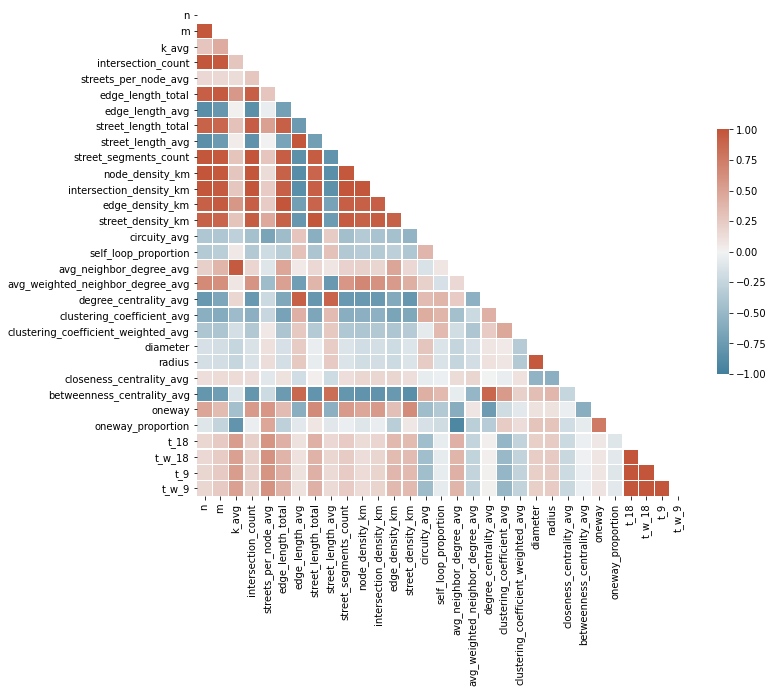

In [48]:
# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [177]:
corrMatrix = corr_data.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

In [35]:
data

n                                                                                   3499
m                                                                                   8022
k_avg                                                                            4.58531
intersection_count                                                                  2930
streets_per_node_avg                                                             2.86368
streets_per_node_counts                {0: 0, 1: 569, 2: 93, 3: 2147, 4: 637, 5: 43, ...
streets_per_node_proportion            {0: 0.0, 1: 0.16261789082595027, 2: 0.02657902...
edge_length_total                                                                 924927
edge_length_avg                                                                  115.299
street_length_total                                                               544700
street_length_avg                                                                109.996
street_segments_count

#### Streets per node proportion

In [81]:
city_list = []
streets_per_node = []
for file in os.listdir(path):
    city_list.append(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    streets_per_node.append(data['streets_per_node_proportion'])

In [82]:
st_node = pd.DataFrame(index=range(7))
for i in range(len(city_list)):
    spn = pd.Series(streets_per_node[i]).to_frame(name=city_list[i])
    st_node = pd.concat([st_node, spn], axis = 1)
st_node = st_node.fillna(0)

In [83]:
st_node.head()

,Amsterdam,Antwerp,Barcelona,Basel,Berlin,Bilbao,Bologna,Bonn,Bordeaux,Bremen,...,Stuttgart,Tokyo,Toronto,Toulouse,Turin,Utrecht,Valencia,Vienna,Warsaw,Zurich
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.098142,0.084963,0.066221,0.104470,0.076786,0.120805,0.140752,0.158658,0.075755,0.096531,...,0.162618,0.162320,0.100067,0.093807,0.054440,0.135270,0.060120,0.064018,0.128114,0.120891
2,0.026203,0.018344,0.010245,0.020270,0.024014,0.021049,0.016514,0.017830,0.015184,0.023756,...,0.026579,0.002229,0.009036,0.022033,0.007532,0.023402,0.009591,0.020571,0.020705,0.062301
3,0.626489,0.687907,0.571789,0.697505,0.554403,0.737340,0.704014,0.681777,0.716169,0.687783,...,0.613604,0.710353,0.597390,0.771157,0.552326,0.670871,0.679216,0.557191,0.638305,0.619830
4,0.239797,0.200821,0.341500,0.169958,0.336792,0.118060,0.131606,0.133273,0.183047,0.185520,...,0.182052,0.123594,0.288822,0.107161,0.366279,0.165975,0.242199,0.347225,0.208347,0.186373


In [84]:
USA_Canada = ['Manhattan', 'Montreal', 'Portland', 'San Francisco', 'Toronto']
Europe = ['Amsterdam', 'Antwerp', 'Barcelona', 'Basel', 'Berlin', 'Bilbao', 'Bologna', 'Bonn', 'Bordeaux',
          'Bremen', 'Bristol', 'Brussels', 'Budapest', 'Cologne', 'Dublin', 'Düsseldorf', 'Frankfurt', 'Geneva', 
          'Hanover', 'Helsinki', 'Karlsruhe', 'Katowice', 'Kraków', 'Linz', 'Lisbon', 'London', 'Lyon', 'Madrid',
         'Mannheim', 'Milan', 'Munich', 'Naples', 'Newcastle', 'Nuremberg', 'Paris', 'Prague', 'Rome', 'Saarbrücken',
         'Seville', 'Stuttgart', 'Toulouse', 'Turin', 'Utrecht', 'Valencia', 'Vienna', 'Warsaw', 'Zurich']
Asia = ['Nagoya', 'Osaka', 'Seoul', 'Tokyo']
Australia = ['Brisbane']
South_America = ['Santiago']

In [85]:
America = pd.DataFrame()
Europ = pd.DataFrame()
Asia_Aus = pd.DataFrame()
for column in st_node.columns:
    if column in USA_Canada or column in South_America:
        America = pd.concat([America, st_node[column]], axis=1)
    if column in Europe:
        Europ = pd.concat([Europ, st_node[column]], axis=1)
    if column in Asia or column in Australia:
        Asia_Aus = pd.concat([Asia_Aus, st_node[column]], axis=1)

In [ ]:
Europ

In [86]:
Euro = Europ.sum(axis=1) / len(Europ.columns)
Ame = America.sum(axis=1) / len(America.columns)
Asia = Asia_Aus.sum(axis=1) / len(Asia_Aus.columns)

In [223]:
Euro.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [224]:
Euro.values

array([0.00000000e+00, 1.16168339e-01, 2.03881301e-02, 6.58573675e-01,
       1.95916625e-01, 7.83627918e-03, 1.03864904e-03, 4.81562817e-05,
       2.40553117e-05, 3.04560489e-06, 3.04560489e-06])

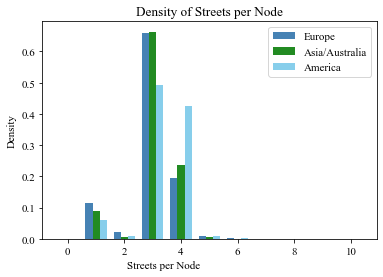

In [90]:
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
plt.title('Density of Streets per Node')
eu = ax.bar(Euro.index - width, Euro.values, width, label='Europe', color='steelblue')
asi = ax.bar(Asia.index, Asia.values, width, label= 'Asia/Australia', color='forestgreen')
am = ax.bar(Ame.index + width, Ame.values, width, label='America', color='skyblue')
plt.xlabel('Streets per Node                                 ')
plt.ylabel('Density')
plt.legend()
plt.savefig('Plots/Density_streets_per_node.pdf')

#### Average neighbor degree
https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.assortativity.average_neighbor_degree.html

In [94]:
city_list = []
neighbor_degree = []
for file in os.listdir(path):
    city_list.append(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    neighbor_degree.append(data['avg_neighbor_degree'])

In [8]:
neighbor_deg = pd.DataFrame()

for i in range(len(city_list)):
    lis = []
    x = [value for value in neighbor_degree[i].values() if value not in lis]
    while x != []:
        lis.append(x[0])
        x = [value for value in neighbor_degree[i].values() if value not in lis]
    s = 0
    for k in range(len(lis)):
        s += sum(value == lis[k] for value in neighbor_degree[i].values())
    len(neighbor_degree[i]) == s #should be True
    lis = sorted(lis, reverse=False)
    ser = dict()
    for j in range(len(lis)):
        ser[lis[j]] = sum(value == lis[j] for value in neighbor_degree[i].values())
    se = pd.Series(ser).to_frame(name=city_list[i])
    neighbor_deg = pd.concat([neighbor_deg, se], axis = 1)
#pd.Series(ser).head()
neighbor_deg.head()

,Amsterdam,Antwerp,Barcelona,Basel,Berlin,Bilbao,Bologna,Bonn,Bordeaux,Bremen,...,Stuttgart,Tokyo,Toronto,Toulouse,Turin,Utrecht,Valencia,Vienna,Warsaw,Zurich
0.000000,41.0,19.0,86.0,19.0,12.0,18.0,24.0,17.0,14.0,10.0,...,18.0,13.0,9.0,36.0,27.0,32.0,37.0,24.0,25.0,20.0
0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
0.500000,17.0,8.0,38.0,2.0,5.0,24.0,12.0,3.0,3.0,10.0,...,3.0,3.0,1.0,19.0,8.0,10.0,31.0,13.0,8.0,4.0


In [20]:
America = pd.DataFrame()
Europ = pd.DataFrame()
Asia_Aus = pd.DataFrame()
for column in neighbor_deg.columns:
    if column in USA_Canada or column in South_America:
        America = pd.concat([America, neighbor_deg[column]], axis=1)
    if column in Europe:
        Europ = pd.concat([Europ, neighbor_deg[column]], axis=1)
    if column in Asia or column in Australia:
        Asia_Aus = pd.concat([Asia_Aus, neighbor_deg[column]], axis=1)

In [58]:
Eur = [[ind] * int(Europ.sum(axis=1)[ind]) for ind in Europ.sum(axis=1).index]
Euro = []
for i in range(len(Eur)):
    for value in Eur[i]:
        Euro.append(value)
Ame = [[ind] * int(America.sum(axis=1)[ind]) for ind in America.sum(axis=1).index]
Americ = []
for i in range(len(Ame)):
    for value in Ame[i]:
        Americ.append(value)
Asi = [[ind] * int(Asia_Aus.sum(axis=1)[ind]) for ind in Asia_Aus.sum(axis=1).index]
Asia_A = []
for i in range(len(Asi)):
    for value in Asi[i]:
        Asia_A.append(value)

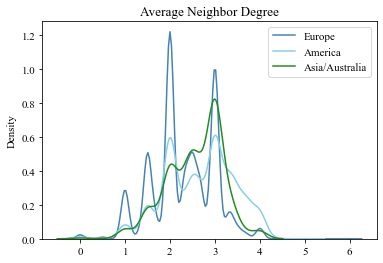

In [78]:
f, ax = plt.subplots()
sns.kdeplot(ax=ax, data=Euro, bw_adjust=1, color='steelblue') #more smoothing: higher bw_adjust
sns.kdeplot(ax=ax, data=Americ, bw_adjust=1, color='skyblue')
sns.kdeplot(ax=ax, data=Asia_A, bw_adjust=1, color='forestgreen')
plt.title('Average Neighbor Degree')
plt.legend(labels=['Europe', 'America', 'Asia/Australia'])
plt.savefig('Plots/Average_neighbor_degree.pdf')

#### Average neighbor degree weighted

In [290]:
x = data['avg_weighted_neighbor_degree']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]

#### Degree centrality

In [92]:
city_list = []
degree_cen = []
for file in os.listdir(path):
    city_list.append(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    degree_cen.append(data['degree_centrality'])

In [98]:
x = data['degree_centrality']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x = {i:x.count(i) for i in x}
x

{0.0002858776443682104: 12,
 0.0005717552887364208: 594,
 0.0008576329331046312: 554,
 0.0011435105774728416: 543,
 0.001429388221841052: 365,
 0.0017152658662092624: 1107,
 0.002001143510577473: 60,
 0.002287021154945683: 256,
 0.0025728987993138934: 7,
 0.003430531732418525: 1}

#### Clustering coefficient

In [99]:
x = data['clustering_coefficient']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x = {i:x.count(i) for i in x}
x

{0: 2729,
 0.1: 14,
 0.13333333333333333: 2,
 0.14285714285714285: 1,
 0.16666666666666666: 143,
 0.2: 19,
 0.26666666666666666: 1,
 0.3: 10,
 0.3333333333333333: 551,
 0.4: 1,
 0.5: 5,
 0.6666666666666666: 8,
 1.0: 15}

In [103]:
x = data['clustering_coefficient_weighted']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x[:5]

[0, 0, 0, 0, 0]

#### Pagerank

In [107]:
x = data['pagerank']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x[:5]

[4.3494713419025326e-05,
 4.3494713419025326e-05,
 4.3494713419025326e-05,
 4.3494713419025326e-05,
 4.3494713419025326e-05]

#### Eccentricity

In [109]:
x = data['eccentricity']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x[:5]

[8127.996000000001,
 8145.506000000001,
 8170.977000000001,
 8182.9450000000015,
 8194.438000000002]

#### Closeness centrality

In [111]:
x = data['closeness_centrality']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

#### Betweenness centrality

In [121]:
x = data['betweenness_centrality']
x = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
x = list(x.values())#[:5]
x[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [131]:
data

n                                                                                   3499
m                                                                                   8022
k_avg                                                                            4.58531
intersection_count                                                                  2930
streets_per_node_avg                                                             2.86368
streets_per_node_counts                {0: 0, 1: 569, 2: 93, 3: 2147, 4: 637, 5: 43, ...
streets_per_node_proportion            {0: 0.0, 1: 0.16261789082595027, 2: 0.02657902...
edge_length_total                                                                 924927
edge_length_avg                                                                  115.299
street_length_total                                                               544700
street_length_avg                                                                109.996
street_segments_count

#### Bearings

In [3]:
city_list = []
bearing_list = []
bearing_w_list = []
for file in os.listdir(path):
    #print(file.replace('.pkl',''))
    data = pd.read_pickle(path + '/' + file)
    city_list.append(file.replace('.pkl', ''))
    bearing_list.append(data['bearing'])
    bearing_w_list.append(data['bearing_weighted'])

In [4]:
bears = []
bears_w = []
for j in range(len(bearing_list)):
    bins = []
    bins_w = []
    for i in range(36):
        if i == 0:
            bins.append(len([ele for ele in bearing_list[j] if (ele > 355) or (ele <= 5)])) #no relative values!
            bins_w.append(len([ele for ele in bearing_w_list[j] if (ele > 355) or (ele <= 5)]))
        else: #i = 1 -->  10*i - 5 , 10*i + 5
            bins.append(len([ele for ele in bearing_list[j] if (ele > 10*i-5) and (ele <= 10*i+5)]))
            bins_w.append(len([ele for ele in bearing_w_list[j] if (ele > 10*i-5) and (ele <= 10*i+5)]))
    bears.append(bins)
    bears_w.append(bins_w)
    #print(bins)
    #Chi^2 test: here only 180 degrees!!
    #print(chisquare(bins[:18])) #only works if absolute frequency is larger than 5 (for every bin/rule of thumb)

In [243]:
print(chisquare(bins[:18]))

Power_divergenceResult(statistic=1995.251189343482, pvalue=0.0)


#### Shannon Entropy
https://en.wikipedia.org/wiki/Entropy_(information_theory)

In [5]:
#Entropy: H(X) = - sum^{n}_{i=1} P(X_i) * ln(P(X_i))
H_unweighted_18 = []
H_weighted_18 = []
for i in range(len(bears)):
    H = 0
    H_w = 0
    for j in range(18):
        prob = bears[i][j] / sum(bears[i][:18])
        prob_w = bears_w[i][j] / sum(bears_w[i][:18])
        H -= prob * np.log(prob)
        H_w -= prob_w * np.log(prob_w)
    H_unweighted_18.append(H)
    H_weighted_18.append(H_w)

In [6]:
print(H_unweighted_18[:10], H_weighted_18[:10])

[2.7966183828822584, 2.8522416716137213, 2.726573902054005, 2.880586352506233, 2.8561918969419957, 2.8684279254116123, 2.7821089312361393, 2.8435231540843184, 2.878134379402916, 2.7976869799245474] [2.7830917584376187, 2.847269497389232, 2.6989210447545036, 2.877387546340267, 2.8467991912167494, 2.857481354206675, 2.7801007867445144, 2.8291500241988707, 2.8779391319380503, 2.7886425120186127]


In [9]:
## Equal distrituted
-np.log(1 / 18)

2.890371757896165

In [10]:
## Extreme distribution
# only 1 bin:
-np.log(1) #0
# two bins (equal): <-- perfect grid
#-np.log(0.5) #0.6931471805599453

-0.0

###### Theta for perfect grid entropy:

In [7]:
theta_18 = []
theta_w_18 = []
for i in range(len(H_unweighted_18)):
    theta = 1 - ((H_unweighted_18[i] + np.log(0.5))/(-np.log(1 / 18) + np.log(0.5)))**2
    theta_w = 1 - ((H_weighted_18[i] + np.log(0.5))/(-np.log(1 / 18) + np.log(0.5)))**2
    theta_18.append(theta)
    theta_w_18.append(theta_w)

In [8]:
print(theta_18[:5])
print(theta_w_18[:5])

[0.08351735602381916, 0.03440634760556349, 0.14353788645248589, 0.008887225905638507, 0.03086986339540132]
[0.09526656047253135, 0.03884855397325282, 0.16667379381614733, 0.011783818038973881, 0.03926820155605415]


In [9]:
b = []
b_w = []
for i in range(int(len(bears[0])/4)):
    b.append(bears[0][i]+bears[0][i+9])
    b_w.append(bears_w[0][i]+bears_w[0][i+9])
print(b,b_w)

[2119, 817, 664, 817, 720, 800, 670, 1616, 1236] [203260, 83875, 61280, 74196, 66215, 67612, 62678, 151559, 109093]


In [10]:
#Entropy: H(X) = - sum^{n}_{i=1} P(X_i) * ln(P(X_i))
H_unweighted_9 = []
H_weighted_9 = []
#every city
for i in range(len(bears)):
    #list with 9 bins (quarter: bin 1 + 10 + 19 + 28)
    b = []
    b_w = []
    for k in range(int(len(bears[i])/4)):
        b.append(bears[i][k] + bears[i][k+9])
        b_w.append(bears_w[i][k] + bears_w[i][k+9])
    H = 0
    H_w = 0
    for j in range(int(len(bears[i])/4)):
        prob = b[j] / sum(b)
        prob_w = b_w[j] / sum(b_w)
        H -= prob * np.log(prob)
        H_w -= prob_w * np.log(prob_w)
    H_unweighted_9.append(H)
    H_weighted_9.append(H_w)

In [11]:
theta_9 = []
theta_w_9 = []
for i in range(len(H_unweighted_9)):
    theta = 1 - ((H_unweighted_9[i] + np.log(1))/(-np.log(1 / 9) + np.log(1)))**2
    theta_w = 1 - ((H_weighted_9[i] + np.log(1))/(-np.log(1 / 9) + np.log(1)))**2
    theta_9.append(theta)
    theta_w_9.append(theta_w)

In [12]:
print(theta_9[:5])
print(theta_w_9[:5])

[0.0822189890113666, 0.03286197027857296, 0.1402876546998587, 0.007255195939597225, 0.02862679773418053]
[0.087738349019026, 0.03520228463094144, 0.16047511419545468, 0.008462638300556047, 0.03288508491832487]


In [13]:
entropy = pd.DataFrame(data=[theta_18, theta_w_18, theta_9, theta_w_9], columns=city_list, index=['t_18', 't_w_18', 't_9', 't_w_9'])

In [37]:
#pd.set_option('display.max_columns', None)

In [14]:
entropy.T

,t_18,t_w_18,t_9,t_w_9
Amsterdam,0.083517,0.095267,0.082219,0.087738
Antwerp,0.034406,0.038849,0.032862,0.035202
Barcelona,0.143538,0.166674,0.140288,0.160475
Basel,0.008887,0.011784,0.007255,0.008463
Berlin,0.030870,0.039268,0.028627,0.032885
Bilbao,0.019874,0.029714,0.015641,0.012439
Bologna,0.096117,0.097854,0.094878,0.093424
Bonn,0.042189,0.054950,0.041049,0.044454
Bordeaux,0.011108,0.011285,0.009343,0.007357
Bremen,0.082586,0.090454,0.078073,0.079985


In [16]:
open_file = open('Entropy' + '.pkl', "wb")
pickle.dump(entropy, open_file)
open_file.close()

In [53]:
H_unweighted_9

[2.1049606528068425,
 2.160820436718058,
 2.037281445218361,
 2.18923942008433,
 2.165546468710308,
 2.1799733793752303,
 2.0903938883330957,
 2.15165465289704,
 2.186935706921354,
 2.1097094904892373,
 2.034805573176956,
 2.1886297959644954,
 2.1747026338757065,
 2.0863453762955295,
 2.1793373935152673,
 2.163670102280176,
 2.186583211568539,
 2.1552009498577345,
 2.1637363295076097,
 2.122553900959528,
 2.1779811101339392,
 2.0985906416371396,
 2.134947409523018,
 2.1870406081159985,
 2.144240780829597,
 2.171392234884093,
 2.154257902992684,
 2.1217854646827172,
 2.1453274958320714,
 1.3041024330193323,
 2.159995862000824,
 2.1613363056925667,
 1.4444170407179406,
 2.1109587911290184,
 1.8851347292787208,
 2.181441154749387,
 2.1635797365515677,
 2.181502113313849,
 1.5237305456771177,
 2.175532109985175,
 0.9712504208068411,
 2.107527344062961,
 2.1786486070259143,
 2.1916188522743383,
 1.818394783736535,
 1.77671743584877,
 2.1537745235693597,
 2.1751573007176814,
 2.1846180837761

In [43]:
## Equal distribution
-np.log(1 / 9) #2.1972245773362196
## Extreme distribution
# only 1 bin:
-np.log(1) #0

-0.0

Scatterplot mit Vergleich der weighted und unweighted bearings oder Vergleich der 90 Grad/180 Grad

In [41]:
H_unweighted2[29]

1.9480833759260354

In [21]:
np.log(18)

2.8903717578961645

In [238]:
len([ele for ele in bearing_list[0] if (ele > 10*i-5) and (ele <= 10*i+5)])

601

In [14]:
bears[0][0] / sum(bears[0][:18])


0.11269690242097473

58

# Bearings von Portland überprüfen!!

In [63]:
city_list[40]

'Portland'

In [66]:
data = pd.read_pickle(path + '/'+ 'Portland.pkl')

In [70]:
data['bearing']
bins = []
bins_w =[]
for i in range(36):
    if i == 0:
        bins.append(len([ele for ele in data['bearing'] if (ele > 355) or (ele <= 5)])) #no relative values!
        bins_w.append(len([ele for ele in data['bearing'] if (ele > 355) or (ele <= 5)]))
    else: #i = 1 -->  10*i - 5 , 10*i + 5
        bins.append(len([ele for ele in data['bearing'] if (ele > 10*i-5) and (ele <= 10*i+5)]))
        bins_w.append(len([ele for ele in data['bearing'] if (ele > 10*i-5) and (ele <= 10*i+5)]))

In [73]:
sum(bins[:18])

10236

In [77]:
3951 /10236 / 2

0.19299531066822978

In [79]:
bins[:18]

[3951,
 127,
 265,
 75,
 126,
 112,
 138,
 80,
 125,
 4032,
 143,
 284,
 120,
 156,
 151,
 92,
 107,
 152]

Grafik mit Städten in unterschiedlichem Symbol (Dreieck, Kreis, etc.)
Kategoriesieren nach Entropy und Node/km

#### Scatter Plot

In [51]:
corr_data[['streets_per_node_avg', 't_18']].head()

,streets_per_node_avg,t_18
Amsterdam,3.036367,0.083517
Antwerp,3.029206,0.034406
Barcelona,3.220787,0.143538
Basel,2.957640,0.008887
Berlin,3.175215,0.030870


In [101]:
corr = corr_data[['t_18', 'streets_per_node_avg']].corr()
print(corr)

                          t_18  streets_per_node_avg
t_18                  1.000000              0.594386
streets_per_node_avg  0.594386              1.000000


In [80]:
USA_Canada = ['Manhattan', 'Montreal', 'Portland', 'San Francisco', 'Toronto']
USA_Canada_pop = [1.632, 1.78, 0.653, 0.883, 2.93]
Europe = ['Amsterdam', 'Antwerp', 'Barcelona', 'Basel', 'Berlin', 'Bilbao', 'Bologna', 'Bonn', 'Bordeaux',
          'Bremen', 'Bristol', 'Brussels', 'Budapest', 'Cologne', 'Dublin', 'Düsseldorf', 'Frankfurt', 'Geneva', 
          'Hanover', 'Helsinki', 'Karlsruhe', 'Katowice', 'Kraków', 'Linz', 'Lisbon', 'London', 'Lyon', 'Madrid',
         'Mannheim', 'Milan', 'Munich', 'Naples', 'Newcastle', 'Nuremberg', 'Paris', 'Prague', 'Rome', 'Saarbrücken',
         'Seville', 'Stuttgart', 'Toulouse', 'Turin', 'Utrecht', 'Valencia', 'Vienna', 'Warsaw', 'Zurich']
Europe_pop = [0.822, 0.499, 1.62, 0.171, 3.645, 0.346, 0.388, 0.327, 0.250,
             0.569, 0.467, 0.174, 1.756, 1.086, 0.544, 0.619, 0.753, 0.199,
             0.532, 0.632, 0.313, 0.302, 0.767, 0.203, 0.505, 8.982, 0.513, 3.223,
             0.309, 1.352, 1.472, 3.085, 0.268, 0.518, 2.161, 1.309, 2.873, 0.178,
             0.689, 0.635, 0.472, 0.887, 1.307, 0.791, 1.897, 1.765, 0.403]
Asia = ['Nagoya', 'Osaka', 'Seoul', 'Tokyo']
Asia_pop = [2.296, 2.691, 9.776, 37.393]
Australia = ['Brisbane']
Australia_pop = [2.28]
South_America = ['Santiago']
South_America_pop = [5.614]

In [114]:
np.arange(10)/10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

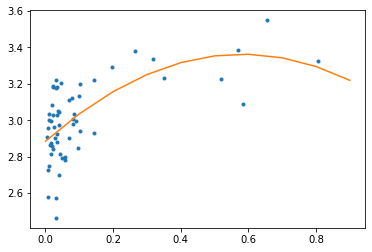

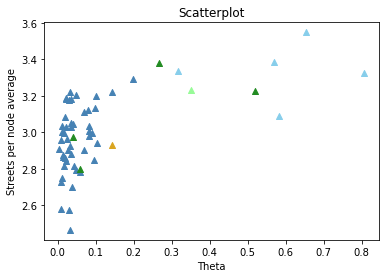

In [94]:
plt.title('Scatterplot')
plt.xlabel('Theta')
plt.ylabel('Streets per node average', rotation=90)

for name in corr_data.index:
    if name in USA_Canada:
        plt.scatter(corr_data['t_18'][name], corr_data['streets_per_node_avg'][name], marker='^', color='skyblue')#, s=USA_Canada_pop[USA_Canada.index(name)]*6
    if name in Europe:
        plt.scatter(corr_data['t_18'][name], corr_data['streets_per_node_avg'][name], marker='^', color='steelblue')#, s=Europe_pop[Europe.index(name)]*6
    if name in Asia:
        plt.scatter(corr_data['t_18'][name], corr_data['streets_per_node_avg'][name], marker='^', color='forestgreen')#, s=Asia_pop[Asia.index(name)]*6
    if name in Australia:
        plt.scatter(corr_data['t_18'][name], corr_data['streets_per_node_avg'][name], marker='^', color='goldenrod')#, s=Australia_pop[Australia.index(name)]*6
    if name in South_America:
        plt.scatter(corr_data['t_18'][name], corr_data['streets_per_node_avg'][name], marker='^', color='palegreen')#, s=South_America_pop[South_America.index(name)]*6

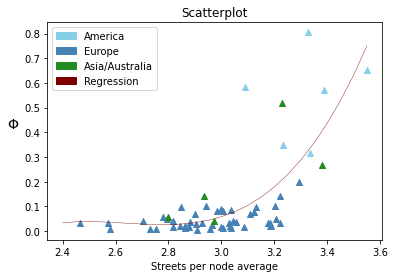

In [146]:
from numpy.polynomial.polynomial import polyfit
y = corr_data['t_18']
x = corr_data['streets_per_node_avg']
# Fit with polyfit
b = polyfit(x, y, 3)

x_reg = np.arange(24)/20 + 2.4
plt.plot(x_reg, b[0] + b[1] * x_reg + b[2] * x_reg**2 + b[3] * x_reg**3, '-', color='maroon', linewidth=0.4)

plt.title('Scatterplot')
plt.ylabel(r'$\Phi$    ', rotation=0, fontsize=14)
plt.xlabel('Streets per node average')

for name in corr_data.index:
    if name in USA_Canada:
        plt.scatter(corr_data['streets_per_node_avg'][name], corr_data['t_18'][name], marker='^', color='skyblue')#, s=USA_Canada_pop[USA_Canada.index(name)]*6
    if name in Europe:
        plt.scatter(corr_data['streets_per_node_avg'][name], corr_data['t_18'][name], marker='^', color='steelblue')#, s=Europe_pop[Europe.index(name)]*6
    if name in Asia:
        plt.scatter(corr_data['streets_per_node_avg'][name], corr_data['t_18'][name], marker='^', color='forestgreen')#, s=Asia_pop[Asia.index(name)]*6
    if name in Australia:
        plt.scatter(corr_data['streets_per_node_avg'][name], corr_data['t_18'][name], marker='^', color='forestgreen')#, s=Australia_pop[Australia.index(name)]*6
    if name in South_America:
        plt.scatter(corr_data['streets_per_node_avg'][name], corr_data['t_18'][name], marker='^', color='skyblue')#, s=South_America_pop[South_America.index(name)]*6

a = mpatches.Patch(color='skyblue', label='America')
b = mpatches.Patch(color='steelblue', label='Europe')
c = mpatches.Patch(color='forestgreen', label='Asia/Australia')
#d = mpatches.Patch(color='goldenrod', label='Australia')
#e = mpatches.Patch(color='palegreen', label='South America')
f = mpatches.Patch(color='maroon', label='Regression')

plt.legend(handles=[a, b, c, f])
plt.savefig('Plots/Scatterplot.pdf')
plt.show()

Density of streets als Größe der Dreiecke

In [82]:
for name in corr_data.index:
    if name in USA_Canada:
        print(name, USA_Canada_pop[USA_Canada.index(name)])

Manhattan 1.632
Montreal 1.78
Portland 0.653
San Francisco 0.883
Toronto 2.93
